#EC5320 Week4a codes: CNN regression (Age detection) - FOR TEACHING

120220243 황상민 과제 제출합니다.

# 1. Install and import libraries

In [ ]:
# upgrade fastai to the most recent version (v. 2.5.3)

%%capture
!pip install fastai --upgrade

In [ ]:
import fastai
print(fastai.__version__)

from fastai.vision.all import *
#from fastai.text.all import *
#from fastai.collab import *
#from fastai.tabular.all import * 

from matplotlib.pyplot import imshow

2.5.6


In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
from google.colab import files

# 2. Download file

In [ ]:
!wget -O imdb_crop_sample.zip 'https://www.dropbox.com/s/cwhhvl5trf4gtvh/imdb_crop_sample.zip?dl=0'

--2022-04-10 07:50:03--  https://www.dropbox.com/s/cwhhvl5trf4gtvh/imdb_crop_sample.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/cwhhvl5trf4gtvh/imdb_crop_sample.zip [following]
--2022-04-10 07:50:03--  https://www.dropbox.com/s/raw/cwhhvl5trf4gtvh/imdb_crop_sample.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8422ee689f4b14a36ad9c4a75a.dl.dropboxusercontent.com/cd/0/inline/BjG5jxRPbE8I9eYHo5fIXcMvv6ze4sqhZmPgmSSpLs83hWzh_PQoLvEfl_fQpmRFTAheDPjIo1NoghGQjlAvzJZPVsu04KExx_7f4o4hXMSB7_PP0i9mHr6tM5gVvgyvKQag4Q9XEjxpZXjEDwhHhwceJpOxXbEUurlv6Ppn0Ne_Ig/file# [following]
--2022-04-10 07:50:03--  https://uc8422ee689f4b14a36ad9c4a75a.dl.dropboxusercontent.com/cd/0/inline/BjG5jxRPbE8I9eYHo5fIXcMvv6ze4sqhZmPgmSS

In [ ]:
%%capture

!unzip imdb_crop_sample.zip -d faces

# 3. Prepare image file path + label dataframe

## 3.1 grab image file paths

In [ ]:
# grab image file paths

import glob
img_full_path = pd.Series(glob.glob('faces/*.jpg'), name='my_file_path')
img_nm = pd.Series(img_full_path.str.split(pat="/").str[1], name='file_nm')

df_imdb_sample = pd.concat([img_full_path, img_nm], axis=1)
df_imdb_sample

,my_file_path,file_nm
0,faces/nm0026119_rm3252262912_1977-3-2_1996.jpg,nm0026119_rm3252262912_1977-3-2_1996.jpg
1,faces/nm0584951_rm2715341312_1986-8-29_2009.jpg,nm0584951_rm2715341312_1986-8-29_2009.jpg
2,faces/nm0000666_rm3618079488_1967-2-20_2009.jpg,nm0000666_rm3618079488_1967-2-20_2009.jpg
3,faces/nm0931736_rm4236225280_1949-1-7_1987.jpg,nm0931736_rm4236225280_1949-1-7_1987.jpg
4,faces/nm0000239_rm692880640_1977-7-1_2011.jpg,nm0000239_rm692880640_1977-7-1_2011.jpg
...,...,...
4995,faces/nm0148418_rm2710475776_1988-6-7_2008.jpg,nm0148418_rm2710475776_1988-6-7_2008.jpg
4996,faces/nm2389665_rm869173248_1988-6-14_2009.jpg,nm2389665_rm869173248_1988-6-14_2009.jpg
4997,faces/nm0000018_rm1886108160_1916-12-9_2003.jpg,nm0000018_rm1886108160_1916-12-9_2003.jpg
4998,faces/nm2244205_rm2533733120_1985-7-1_2011.jpg,nm2244205_rm2533733120_1985-7-1_2011.jpg


In [ ]:
# 파일명 뒤에서 8번째~4번째를 추출해서 photo taken 속성으로 생성

df_imdb_sample["photo_taken"] = df_imdb_sample['file_nm'].str[-8:-4]
df_imdb_sample.head()

,my_file_path,file_nm,photo_taken
0,faces/nm0026119_rm3252262912_1977-3-2_1996.jpg,nm0026119_rm3252262912_1977-3-2_1996.jpg,1996
1,faces/nm0584951_rm2715341312_1986-8-29_2009.jpg,nm0584951_rm2715341312_1986-8-29_2009.jpg,2009
2,faces/nm0000666_rm3618079488_1967-2-20_2009.jpg,nm0000666_rm3618079488_1967-2-20_2009.jpg,2009
3,faces/nm0931736_rm4236225280_1949-1-7_1987.jpg,nm0931736_rm4236225280_1949-1-7_1987.jpg,1987
4,faces/nm0000239_rm692880640_1977-7-1_2011.jpg,nm0000239_rm692880640_1977-7-1_2011.jpg,2011


In [ ]:
# date of birth를 추출하기 위해서 파일명을 일단 _를 기준으로 분리시켜서 date of birth 속성에 삽입

df_imdb_sample["date_of_birth"] = df_imdb_sample['file_nm'].str.split("_")
df_imdb_sample.head()

,my_file_path,file_nm,photo_taken,date_of_birth
0,faces/nm0026119_rm3252262912_1977-3-2_1996.jpg,nm0026119_rm3252262912_1977-3-2_1996.jpg,1996,"[nm0026119, rm3252262912, 1977-3-2, 1996.jpg]"
1,faces/nm0584951_rm2715341312_1986-8-29_2009.jpg,nm0584951_rm2715341312_1986-8-29_2009.jpg,2009,"[nm0584951, rm2715341312, 1986-8-29, 2009.jpg]"
2,faces/nm0000666_rm3618079488_1967-2-20_2009.jpg,nm0000666_rm3618079488_1967-2-20_2009.jpg,2009,"[nm0000666, rm3618079488, 1967-2-20, 2009.jpg]"
3,faces/nm0931736_rm4236225280_1949-1-7_1987.jpg,nm0931736_rm4236225280_1949-1-7_1987.jpg,1987,"[nm0931736, rm4236225280, 1949-1-7, 1987.jpg]"
4,faces/nm0000239_rm692880640_1977-7-1_2011.jpg,nm0000239_rm692880640_1977-7-1_2011.jpg,2011,"[nm0000239, rm692880640, 1977-7-1, 2011.jpg]"


In [ ]:
# 리스트 내에서 date of birth가 속한 위치 추출

for i in range(0, len(df_imdb_sample)) :
  df_imdb_sample["date_of_birth"][i] = df_imdb_sample["date_of_birth"][i][2]
df_imdb_sample.head()

,my_file_path,file_nm,photo_taken,date_of_birth
0,faces/nm0026119_rm3252262912_1977-3-2_1996.jpg,nm0026119_rm3252262912_1977-3-2_1996.jpg,1996,1977-3-2
1,faces/nm0584951_rm2715341312_1986-8-29_2009.jpg,nm0584951_rm2715341312_1986-8-29_2009.jpg,2009,1986-8-29
2,faces/nm0000666_rm3618079488_1967-2-20_2009.jpg,nm0000666_rm3618079488_1967-2-20_2009.jpg,2009,1967-2-20
3,faces/nm0931736_rm4236225280_1949-1-7_1987.jpg,nm0931736_rm4236225280_1949-1-7_1987.jpg,1987,1949-1-7
4,faces/nm0000239_rm692880640_1977-7-1_2011.jpg,nm0000239_rm692880640_1977-7-1_2011.jpg,2011,1977-7-1


In [ ]:
# training 코드와의 호환성을 위해서 연도만 추출

df_imdb_sample["date_of_birth"] = df_imdb_sample["date_of_birth"].str[0:4]
df_imdb_sample.head()

,my_file_path,file_nm,photo_taken,date_of_birth
0,faces/nm0026119_rm3252262912_1977-3-2_1996.jpg,nm0026119_rm3252262912_1977-3-2_1996.jpg,1996,1977
1,faces/nm0584951_rm2715341312_1986-8-29_2009.jpg,nm0584951_rm2715341312_1986-8-29_2009.jpg,2009,1986
2,faces/nm0000666_rm3618079488_1967-2-20_2009.jpg,nm0000666_rm3618079488_1967-2-20_2009.jpg,2009,1967
3,faces/nm0931736_rm4236225280_1949-1-7_1987.jpg,nm0931736_rm4236225280_1949-1-7_1987.jpg,1987,1949
4,faces/nm0000239_rm692880640_1977-7-1_2011.jpg,nm0000239_rm692880640_1977-7-1_2011.jpg,2011,1977


## 3.2 grab ground truth dataset (MATLAB data)

## 3.3 Merge my image file df with ground truth data

In [ ]:
# check if missing variable
df_imdb_sample.isnull().sum()

my_file_path     0
file_nm          0
photo_taken      0
date_of_birth    0
dtype: int64

In [ ]:
df_imdb_sample.shape

(5000, 4)

## 3.4 Calculate age

In [ ]:
# 안 된다.

df_imdb_sample['photo_taken'] = pd.to_numeric(df_imdb_sample['photo_taken'])
df_imdb_sample['date_of_birth'] = pd.to_numeric(df_imdb_sample['date_of_birth'])

ValueError: ignored

In [ ]:
# 위에 에러 내용 확인해보니 파일명이 잘못된 data가 하나 있는 정도여서 그냥 수동으로 제거
df_imdb_sample = df_imdb_sample.drop(df_imdb_sample.index[4890])

In [ ]:
# 하나 없애주니까 잘 된다.
df_imdb_sample['photo_taken'] = pd.to_numeric(df_imdb_sample['photo_taken'])
df_imdb_sample['date_of_birth'] = pd.to_numeric(df_imdb_sample['date_of_birth'])

In [ ]:
# calculate age
df_imdb_sample['age'] = df_imdb_sample['photo_taken'] - df_imdb_sample['date_of_birth']

# some guys seem to be greater than 100. some of these are paintings. remove these old guys
df_imdb_sample = df_imdb_sample[df_imdb_sample['age'] <= 100]

# some guys seem to be unborn in the data set
df_imdb_sample = df_imdb_sample[df_imdb_sample['age'] > 0]

In [ ]:
# age의 outlier가 제거된 상태
df_imdb_sample.shape

(4994, 5)

In [ ]:
# age가 추가됐다.
df_imdb_sample

,my_file_path,file_nm,photo_taken,date_of_birth,age
0,faces/nm0026119_rm3252262912_1977-3-2_1996.jpg,nm0026119_rm3252262912_1977-3-2_1996.jpg,1996,1977,19
1,faces/nm0584951_rm2715341312_1986-8-29_2009.jpg,nm0584951_rm2715341312_1986-8-29_2009.jpg,2009,1986,23
2,faces/nm0000666_rm3618079488_1967-2-20_2009.jpg,nm0000666_rm3618079488_1967-2-20_2009.jpg,2009,1967,42
3,faces/nm0931736_rm4236225280_1949-1-7_1987.jpg,nm0931736_rm4236225280_1949-1-7_1987.jpg,1987,1949,38
4,faces/nm0000239_rm692880640_1977-7-1_2011.jpg,nm0000239_rm692880640_1977-7-1_2011.jpg,2011,1977,34
...,...,...,...,...,...
4995,faces/nm0148418_rm2710475776_1988-6-7_2008.jpg,nm0148418_rm2710475776_1988-6-7_2008.jpg,2008,1988,20
4996,faces/nm2389665_rm869173248_1988-6-14_2009.jpg,nm2389665_rm869173248_1988-6-14_2009.jpg,2009,1988,21
4997,faces/nm0000018_rm1886108160_1916-12-9_2003.jpg,nm0000018_rm1886108160_1916-12-9_2003.jpg,2003,1916,87
4998,faces/nm2244205_rm2533733120_1985-7-1_2011.jpg,nm2244205_rm2533733120_1985-7-1_2011.jpg,2011,1985,26


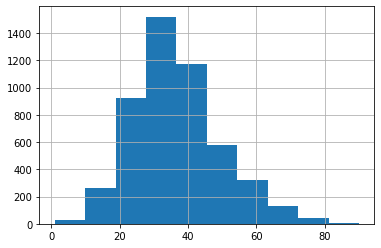

In [ ]:
df_imdb_sample['age'].hist()

# 9. Prepare data for CNN

In [ ]:
# data block settings

my_random_seed = 42
my_batch_size = 64

In [ ]:
from fastai.vision.data import ImageDataLoaders

In [ ]:
df_imdb_simple = df_imdb_sample[['my_file_path','age']]
df_imdb_simple

,my_file_path,age
0,faces/nm0026119_rm3252262912_1977-3-2_1996.jpg,19
1,faces/nm0584951_rm2715341312_1986-8-29_2009.jpg,23
2,faces/nm0000666_rm3618079488_1967-2-20_2009.jpg,42
3,faces/nm0931736_rm4236225280_1949-1-7_1987.jpg,38
4,faces/nm0000239_rm692880640_1977-7-1_2011.jpg,34
...,...,...
4995,faces/nm0148418_rm2710475776_1988-6-7_2008.jpg,20
4996,faces/nm2389665_rm869173248_1988-6-14_2009.jpg,21
4997,faces/nm0000018_rm1886108160_1916-12-9_2003.jpg,87
4998,faces/nm2244205_rm2533733120_1985-7-1_2011.jpg,26


In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, RegressionBlock),
    get_x=ColReader('my_file_path'), 
    get_y=ColReader('age'),
    splitter=RandomSplitter(valid_pct=0.2, seed=my_random_seed),
    item_tfms=Resize(128)
).dataloaders(df_imdb_simple)

In [ ]:
len(dls.train_ds), len(dls.valid_ds)

(3996, 998)

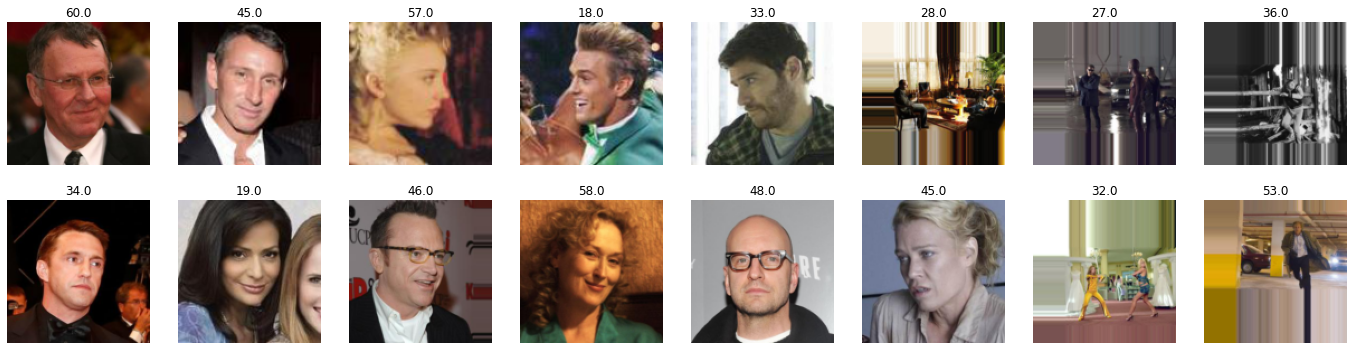

In [ ]:
# show image examples

dls.show_batch(max_n=16, nrows=2)

# 10. Train CNN model

In [ ]:
#learn = 'change metric to rmse'

learn = cnn_learner(dls, resnet34, metrics=rmse)
learn.fine_tune(7)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,_rmse,time
0,1468.126099,1339.642578,36.601128,00:27


epoch,train_loss,valid_loss,_rmse,time
0,1333.964111,1284.880615,35.845230,00:28
1,1188.391968,1000.489868,31.630522,00:27
2,857.408752,715.807068,26.754570,00:27
3,496.368378,364.099762,19.081398,00:27
4,263.797913,228.486496,15.115769,00:26
5,148.406555,192.672745,13.880661,00:26
6,103.301552,188.796707,13.740332,00:27


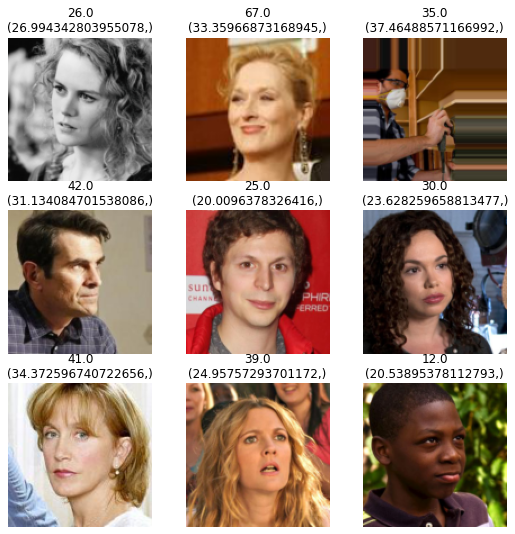

In [ ]:
learn.show_results()

# 11. Test using your own image

In [ ]:
from google.colab import files

In [ ]:
# upload an image file

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file: {name}'.format(name=fn))

Saving 교수님.jpg to 교수님.jpg
User uploaded file: 교수님.jpg


In [ ]:
# get the file name of the uploaded file 

img_name = list(uploaded.keys())[0]

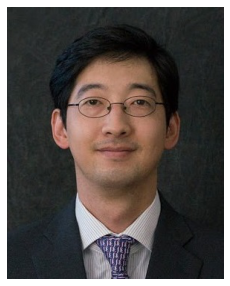

In [ ]:
# predict

img = PILImage.create(uploaded[img_name])

img.show()

In [ ]:
learn.predict(img)

((38.170413970947266), TensorBase([38.1704]), TensorBase([38.1704]))

# 12. Image augmentation

## 12.1 Radome Resized Crop

In [ ]:
dls_aug = DataBlock(
    blocks=(ImageBlock, RegressionBlock),
    get_x=ColReader('my_file_path'), 
    get_y=ColReader('age'),
    splitter=RandomSplitter(valid_pct=0.2, seed=my_random_seed),
    item_tfms=RandomResizedCrop(128, min_scale=0.7)
).dataloaders(df_imdb_simple)

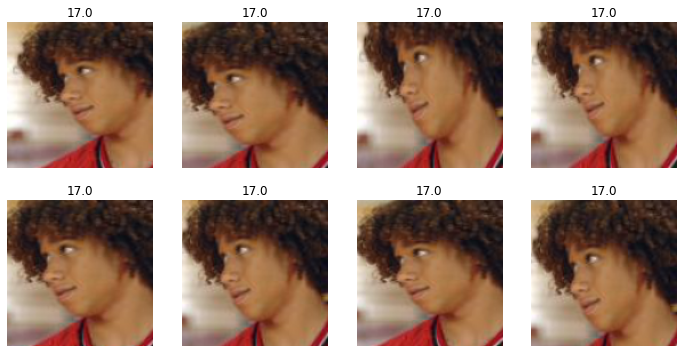

In [ ]:
dls_aug.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learn = cnn_learner(dls_aug, resnet34, metrics=rmse).to_fp16() # resnet 18, 34, 50, 101, 152
learn.fine_tune(15)

epoch,train_loss,valid_loss,_rmse,time
0,1476.785156,1354.829712,36.808010,00:24


epoch,train_loss,valid_loss,_rmse,time
0,1364.865845,1314.521240,36.256329,00:25
1,1293.383057,1270.843506,35.648895,00:25
2,1146.072632,995.864990,31.557329,00:25
3,861.113098,649.263550,25.480650,00:24
4,505.242767,274.016876,16.553455,00:25
5,256.233124,200.962357,14.176119,00:25
6,144.969162,176.482239,13.284662,00:25
7,108.598701,177.546463,13.324656,00:24
8,86.375114,164.326035,12.818972,00:25
9,73.923904,157.485641,12.549329,00:25


## 12.2 aug_transforms

In [ ]:
dls_aug2 = DataBlock(
    blocks=(ImageBlock, RegressionBlock),
    get_x=ColReader('my_file_path'), 
    get_y=ColReader('age'),
    splitter=RandomSplitter(valid_pct=0.2, seed=my_random_seed),
    item_tfms=Resize(128),
    batch_tfms=aug_transforms(mult=2)
).dataloaders(df_imdb_simple)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


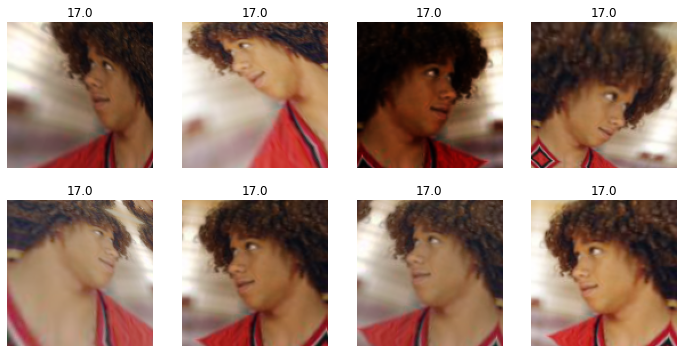

In [ ]:
dls_aug2.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learn = cnn_learner(dls_aug2, resnet34, metrics=rmse).to_fp16() # resnet 18, 34, 50, 101, 152
learn.fine_tune(15)

epoch,train_loss,valid_loss,_rmse,time
0,1467.655151,1298.694946,36.037411,00:26


epoch,train_loss,valid_loss,_rmse,time
0,1363.635010,1290.584839,35.924713,00:28
1,1302.911987,1187.770752,34.464050,00:28
2,1168.014893,866.296326,29.432911,00:28
3,894.833252,643.543274,25.368153,00:28
4,546.317017,262.842468,16.212418,00:28
5,307.232758,186.674805,13.662899,00:28
6,202.569092,171.799744,13.107241,00:28
7,164.592667,152.929688,12.366474,00:28
8,146.235809,147.553024,12.147141,00:28
9,137.174805,152.753540,12.359350,00:28


# 13. Early stopping

In [ ]:
learn.validate()

(#2) [151.7748565673828,12.319693565368652]

In [ ]:
learn.path = Path('./')

learn = cnn_learner(dls_aug2, resnet34, metrics=rmse).to_fp16() # resnet 18, 34, 50, 101, 152
learn.fine_tune(50, cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=3),SaveModelCallback(monitor='valid_loss')])

epoch,train_loss,valid_loss,_rmse,time
0,1479.320435,1319.795410,36.328991,00:27


Better model found at epoch 0 with valid_loss value: 1319.79541015625.


epoch,train_loss,valid_loss,_rmse,time
0,1352.927490,1281.679321,35.800552,00:28
1,1332.776978,1218.319824,34.904438,00:28
2,1265.347778,1134.584961,33.683598,00:28
3,1182.817749,1003.423279,31.676859,00:28
4,1082.915527,936.234253,30.597946,00:27
5,936.442993,783.388123,27.989071,00:27
6,750.584290,573.683960,23.951702,00:27
7,530.066101,318.826996,17.855728,00:27
8,344.826630,213.779190,14.621190,00:27
9,226.650665,167.090302,12.926341,00:27


Better model found at epoch 0 with valid_loss value: 1281.6793212890625.
Better model found at epoch 1 with valid_loss value: 1218.31982421875.
Better model found at epoch 2 with valid_loss value: 1134.5849609375.
Better model found at epoch 3 with valid_loss value: 1003.4232788085938.
Better model found at epoch 4 with valid_loss value: 936.2342529296875.
Better model found at epoch 5 with valid_loss value: 783.3881225585938.
Better model found at epoch 6 with valid_loss value: 573.6839599609375.
Better model found at epoch 7 with valid_loss value: 318.8269958496094.
Better model found at epoch 8 with valid_loss value: 213.77919006347656.
Better model found at epoch 9 with valid_loss value: 167.09030151367188.
Better model found at epoch 10 with valid_loss value: 160.1639862060547.
No improvement since epoch 10: early stopping


In [ ]:
learn.validate()

(#2) [160.1639862060547,12.65559196472168]